# **Customer Retaintion Analysis**

Dataset: We take Telco company dataset from the Kaggle platform and in this sample data set containing customer data and showing customers who have left last month.

#Context:
 We will develop the model to predict behaviour to retain customers so we can analyze all relevant customer data and develop model for focus on  customer retention programs.

#Dataset Info:

- Each row represents a customer, each column contains customers attributes described on the column Metadata.

- Customers who left within the last month the column is called Churn.

- Services that each customer has signed up for  phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies.

- Customer account information how long they have been a customer, contract, payment method, paperless billing, monthly charges, and total charges.

- Demographic info about customers gender, age range, and if they have partners and dependents.

- Dataset Link: https://www.kaggle.com/datasets/blastchar/telco-customer-churn


# 1. import require libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# 2. Load dataset

**telco_customer_churning_dataset.csv**

In [3]:
telco_base_data = pd.read_csv(r'/content/telco_customer_churning_dataset.csv')
telco_base_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# 3. Check the various attributes of the data like
- shape(rows and cols).


In [4]:
telco_base_data.shape

(7043, 21)

 # 4. check the column names

In [5]:
telco_base_data.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

# 6. Cheking the data types of the all columns.


In [6]:
telco_base_data.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


# 7. Check the descriptive statistics for numerical variables.

In [7]:
telco_base_data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


**Write down the information which we get in the above table:**

- SeniorCitizen is actually a catigorical data column hence the 25% - 50% -75% distribution is not proper.

- 75% customers have tenure less than 55 month.

- Average Monthly charges are USD 64.76 whereas 25% customers pay more than USD 89.85 per month.




# 8. Check there is any null value present in the dataset?

In [8]:
telco_base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


 **Above output we can see that there is no null value in the dataset.**

In [8]:
#telco_base_data.isnull().sum()

# 9. let's create bar chart on the 'Churn' column.

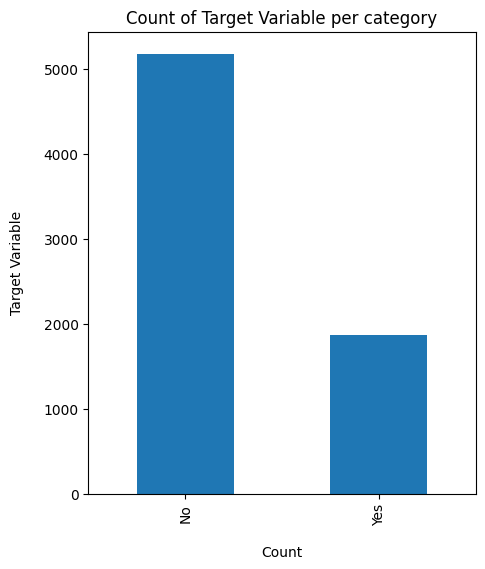

In [9]:
telco_base_data['Churn'].value_counts().plot(kind='bar',figsize=(5,6))

plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of Target Variable per category")
plt.show()

In [10]:
telco_base_data['Churn'].value_counts()

,count
Churn,
No,5174
Yes,1869


In [11]:
# Find out the percentage of the customers who already left the company services.
100*telco_base_data['Churn'].value_counts()/len(telco_base_data['Churn'])

,count
Churn,
No,73.463013
Yes,26.536987


# Here we get some insight about the data:

- As per the output result 26.53% is customer churning rate and it is very high rate.
- Data is highly inbalanced.
- so we can analyse the data with other features while the target values separately to get some insights.

In [12]:
telco_base_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


**Here, we don't have any missing value in the dataset.**

# **Data Cleaning**

- Create a copy of the base data for manupulation and processing.

In [13]:
telco_data = telco_base_data.copy()
telco_data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


- Here 'TotalCharges' column has object data type but it should be numeric amount. let's convert it to numerical data type.

In [14]:
telco_data.TotalCharges = pd.to_numeric(telco_data.TotalCharges, errors='coerce')
telco_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


- Now we change data type of TotalCharges' column from object data type to float data type.

In [15]:
telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


- Here we can see that TotalCharges have 11 null values. let's check the records.

In [16]:
telco_data.loc[telco_data['TotalCharges'].isnull()==True]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


# **Missing Value Treatment**

- Since the % of these records compared to total dataset is very low i.e. 0.15%, it is safe to ignore them from furthuer processing.

In [17]:
telco_data.dropna(how='any',inplace=True)

In [18]:
telco_data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


# **Feature Binning**

- when we plot the graph we do not find any insight from tenure because tenure/age is a countinus value.

- we use bins to check the insight.

- Divide customers into bins based on tenure.

In [19]:
print(telco_data['tenure'].max())

72


In [20]:
labels = ["{0} - {1}".format(i, i+11) for i in range(1,72,12)]
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


- Group the tenure in bins of 12 months.

In [21]:
labels = ["{0} - {1}".format(i,i+11) for i in range(1,72,12)]
telco_data['tenure_group'] = pd.cut(telco_data.tenure,range(1,80,12),right=False,labels = labels)

In [22]:
print(labels)

['1 - 12', '13 - 24', '25 - 36', '37 - 48', '49 - 60', '61 - 72']


In [23]:
telco_data['tenure_group'].value_counts()

,count
tenure_group,
1 - 12,2175
61 - 72,1407
13 - 24,1024
25 - 36,832
49 - 60,832
37 - 48,762


- Now we removing some columns which do not help me to get the insight about the data.

- we remove 'tenure' column because we already create tenure group column with bins because without bin the tenure not provide good insight about the dataset.
- we also remove 'customerID'.

In [26]:
# telco_data.drop(columns=['customerID','tenure'], axis=1, inplace=True)
telco_data.drop(columns=['customerID'], axis=1, inplace=True)

# telco_data.head()

#**Now our data is cleaned and we can perfom the data explorations**

# **Univariate analysis**

- Here we only use categorical data so we remove numerical columns and 'SeniorCitizen' is also consider categorical column so we do't remove this column from the dataset.

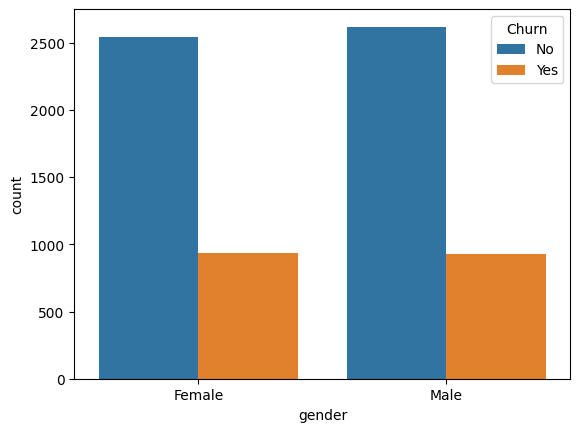

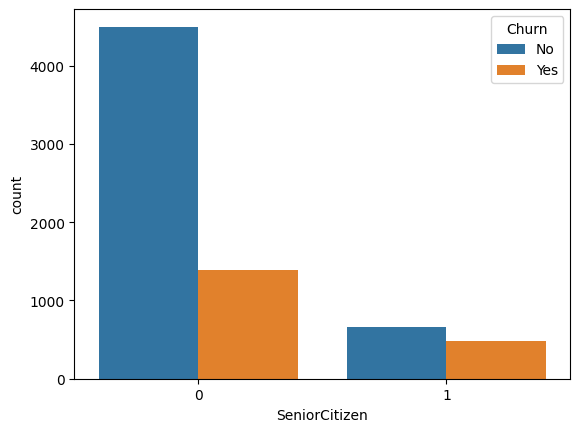

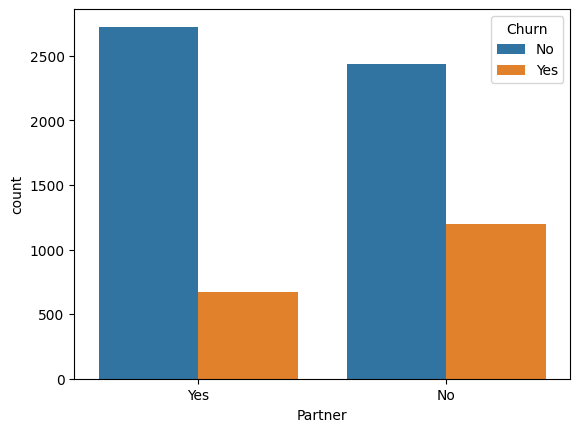

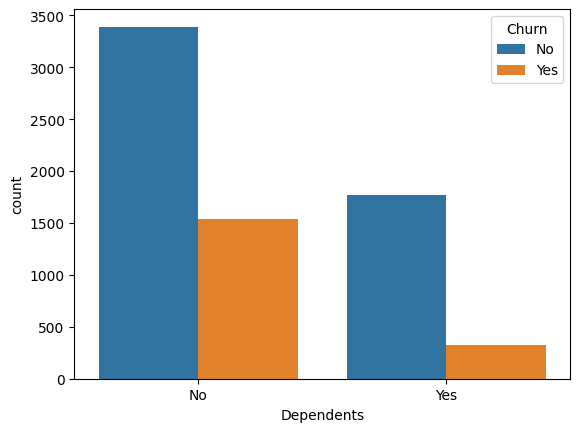

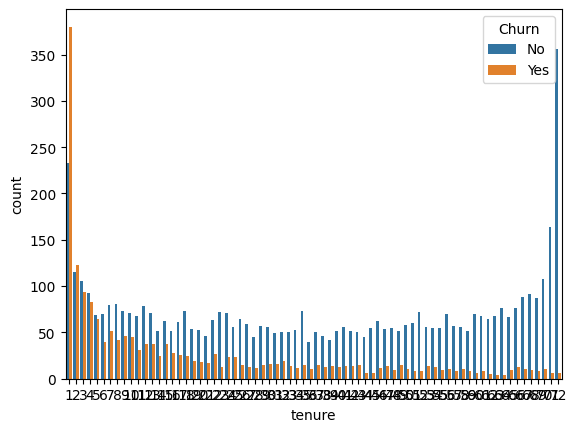

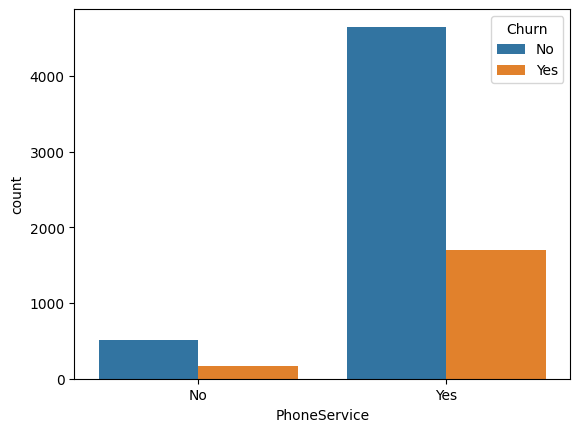

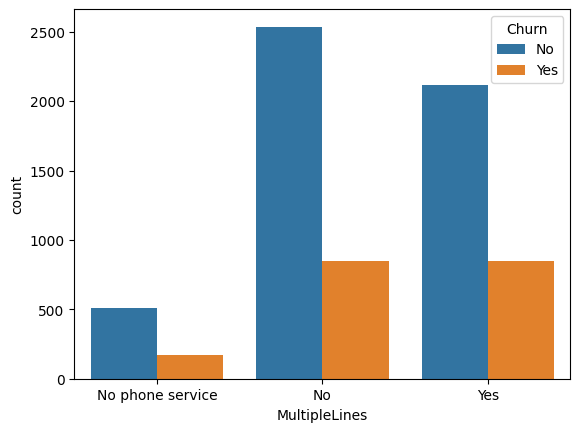

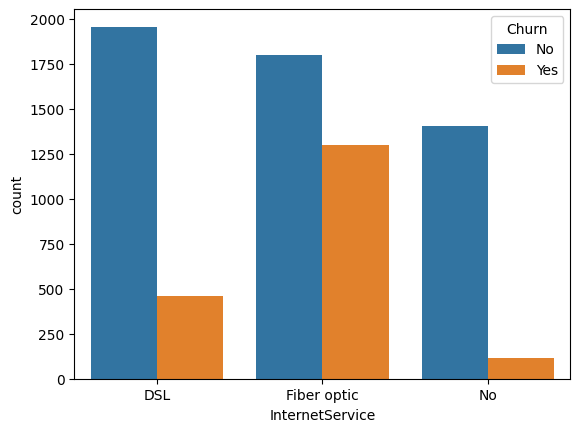

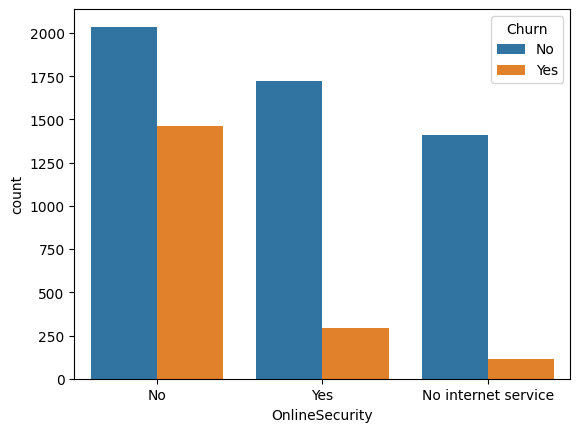

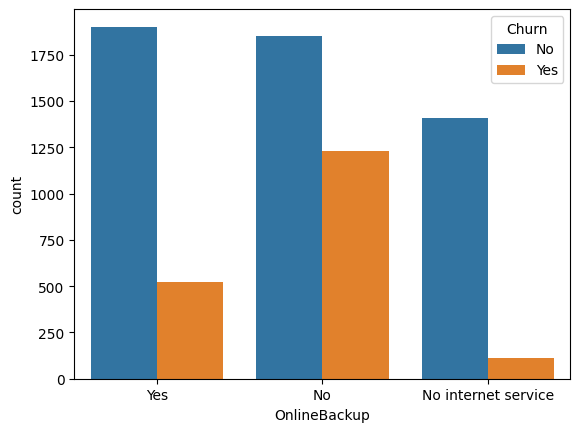

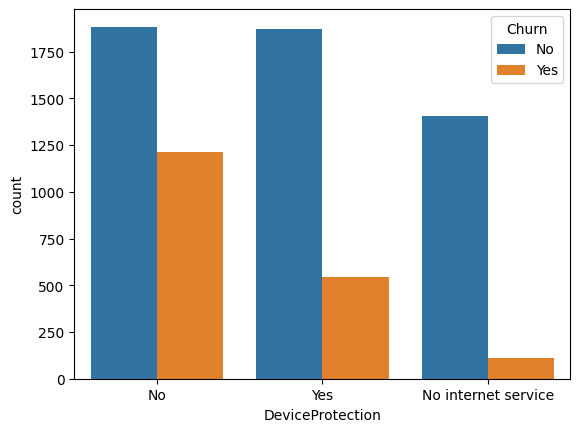

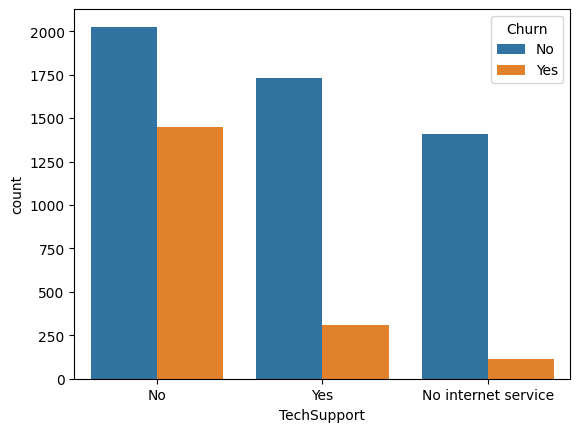

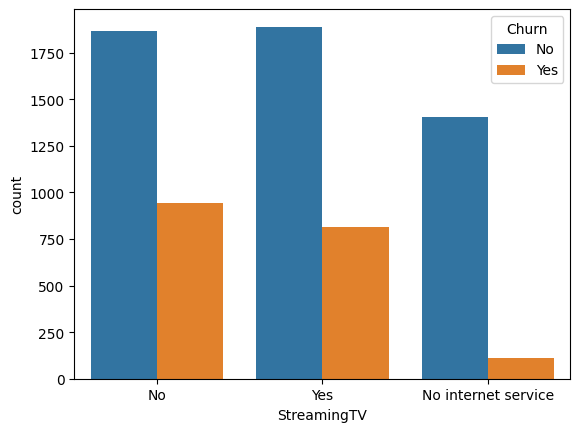

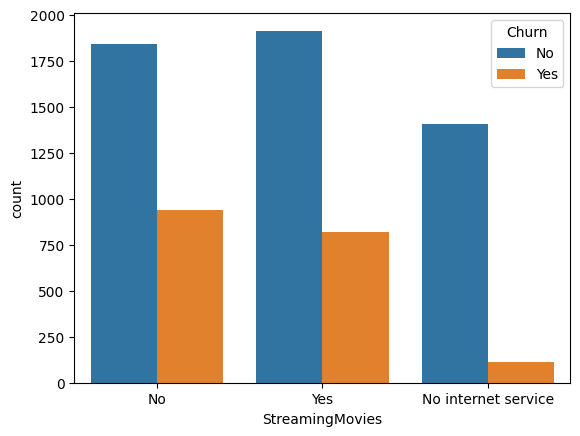

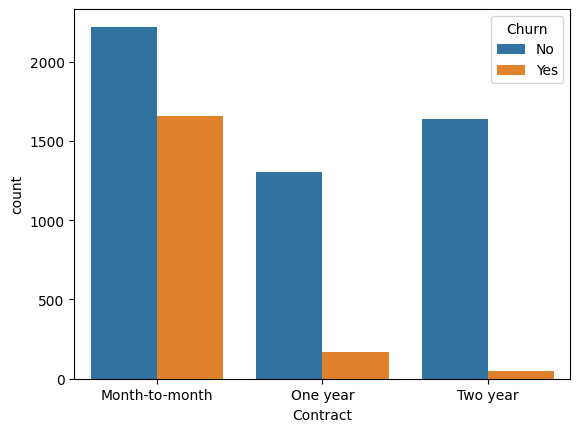

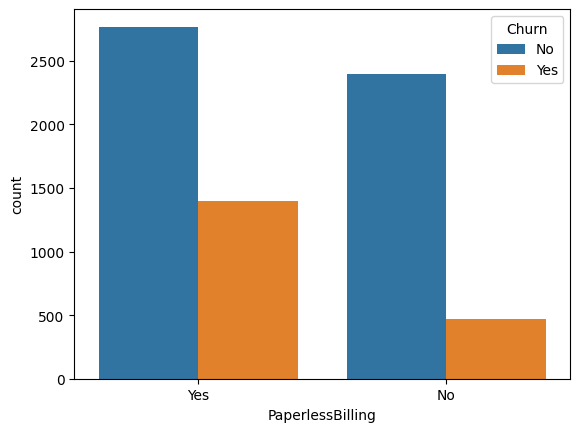

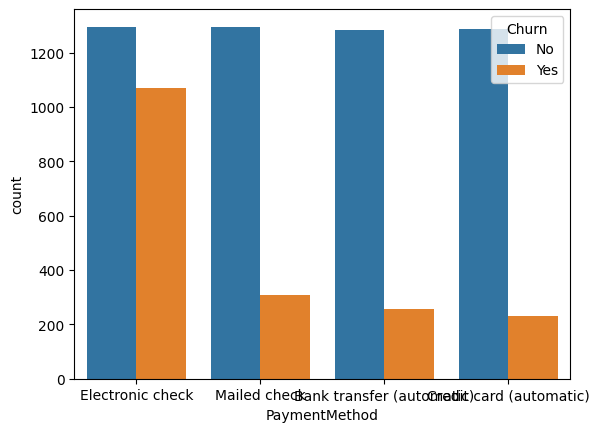

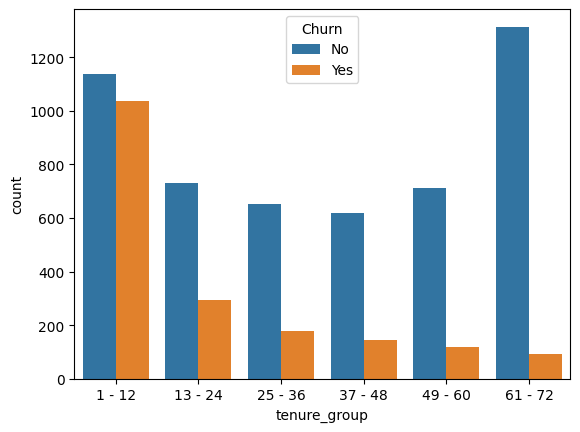

In [27]:
for i, predictor in enumerate(telco_data.drop(columns=['Churn','TotalCharges','MonthlyCharges'])):
  plt.figure(i)
  sns.countplot(data=telco_data, x= predictor, hue='Churn')

-  Convert the target variable 'Churn' in a binary numeric variable i.e. Yes=1 ; No = 0

In [28]:
telco_data['Churn'] = np.where(telco_data.Churn == 'Yes',1,0)

In [29]:
telco_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,1 - 12
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,25 - 36
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,1 - 12
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,37 - 48
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,1 - 12


- Convert all the categorical variables into dummy variables

In [30]:
telco_data_dummies = pd.get_dummies(telco_data)
telco_data_dummies.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,1,29.85,29.85,0,True,False,False,True,True,...,False,False,True,False,True,False,False,False,False,False
1,0,34,56.95,1889.50,0,False,True,True,False,True,...,False,False,False,True,False,False,True,False,False,False
2,0,2,53.85,108.15,1,False,True,True,False,True,...,False,False,False,True,True,False,False,False,False,False
3,0,45,42.30,1840.75,0,False,True,True,False,True,...,True,False,False,False,False,False,False,True,False,False
4,0,2,70.70,151.65,1,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,False


- Relationship between Monthly Charges and Total Charges

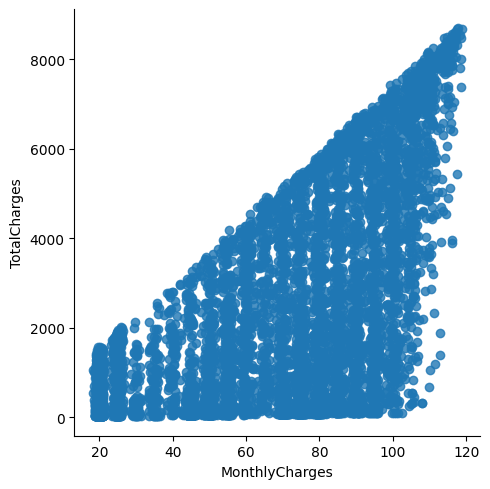

In [31]:
sns.lmplot(data=telco_data_dummies, x='MonthlyCharges', y='TotalCharges', fit_reg=False)

- insight: Total Charges increase as Monthly Charges increase - as expected.

- Churn by Monthly Charges and Total Charges

<ipython-input-32-940d64c03b8e>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
<ipython-input-32-940d64c03b8e>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],


Text(0.5, 1.0, 'Monthly charges by churn')

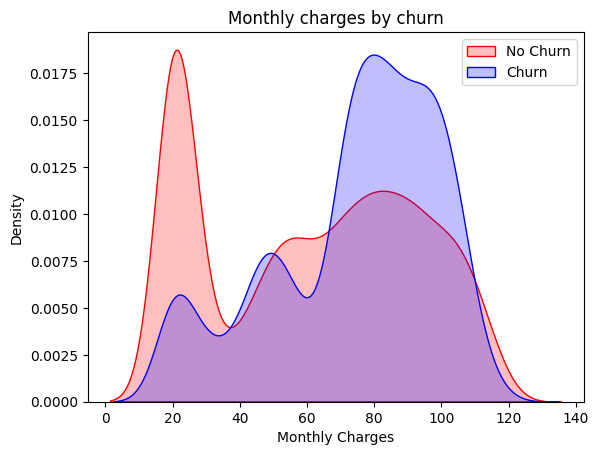

In [32]:
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", shade = True)
Mth = sns.kdeplot(telco_data_dummies.MonthlyCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Mth, color="Blue", shade= True)
Mth.legend(["No Churn","Churn"],loc='upper right')
Mth.set_ylabel('Density')
Mth.set_xlabel('Monthly Charges')
Mth.set_title('Monthly charges by churn')

- Insight: Churn is high when Monthly Charges ar high.

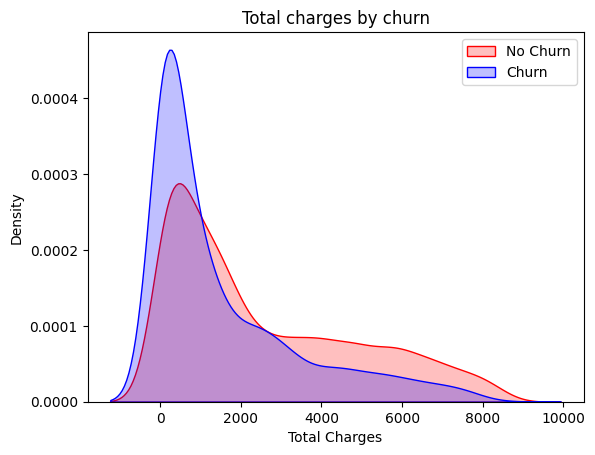

In [33]:
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 0) ],
                color="Red", fill = True)
Tot = sns.kdeplot(telco_data_dummies.TotalCharges[(telco_data_dummies["Churn"] == 1) ],
                ax =Tot, color="Blue", fill= True)
Tot.legend(["No Churn","Churn"],loc='upper right')
Tot.set_ylabel('Density')
Tot.set_xlabel('Total Charges')
Tot.set_title('Total charges by churn')
plt.show()

- **Surprising insight ** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

**Build a corelation of all predictors with 'Churn'**

<Axes: >

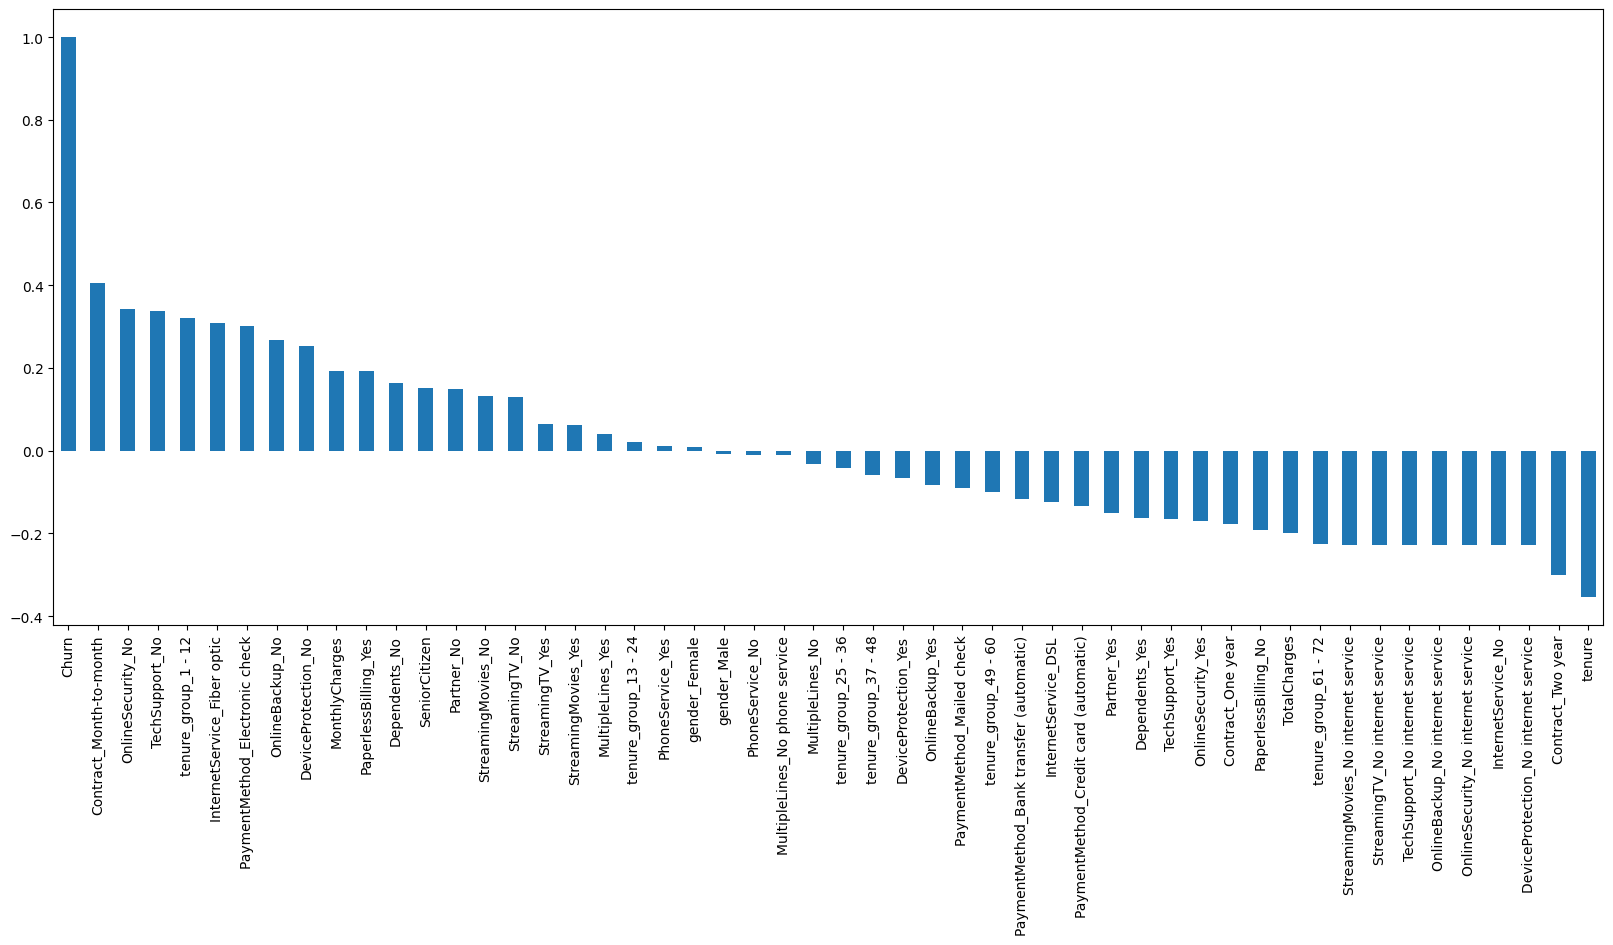

In [34]:
plt.figure(figsize=(20,8))
telco_data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

**Derived Insight:**
- HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

- LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

- Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

- This is also evident from the Heatmap below

<Axes: >

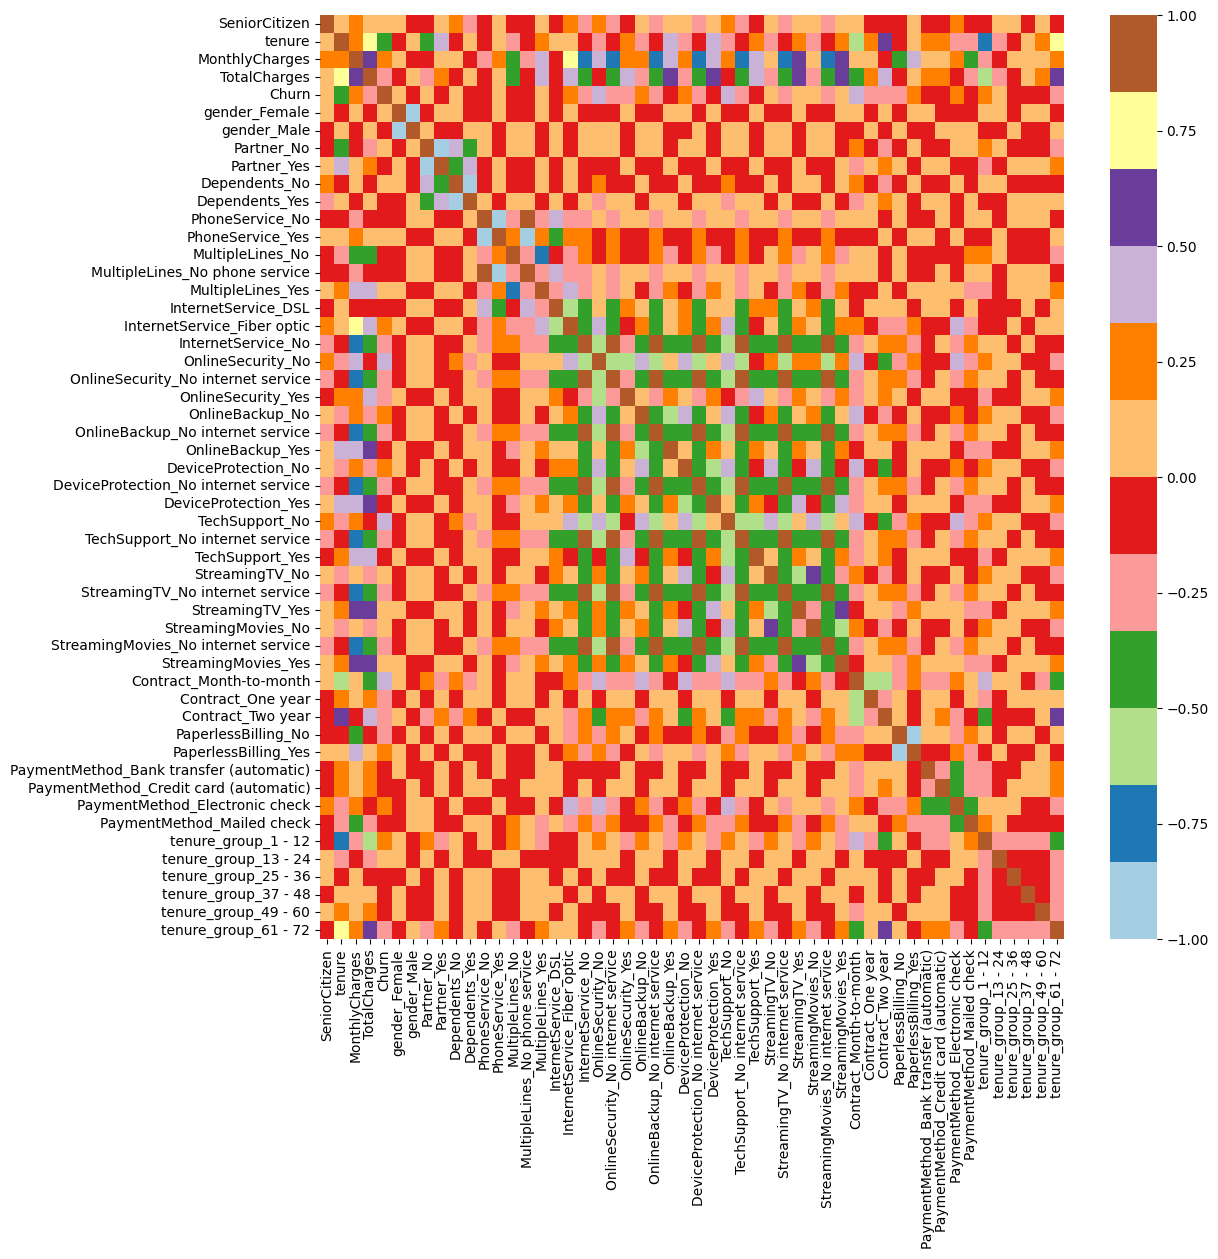

In [35]:
plt.figure(figsize=(12,12))
sns.heatmap(telco_data_dummies.corr(), cmap="Paired")

Conclusion:-

These are some of the quick insights from this exercise:

- Electronic check medium are the highest churners

- Contract Type - Monthly customers are more likely to churn because of no contract terms, as they are free to go customers.

- No Online security, No Tech Support category are high churners

- Non senior Citizens are high churners

- again import  the dataset.

In [47]:
df = pd.read_csv(r'/content/telco_customer_churning_dataset.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Select important columns

In [48]:
# Define the columns to keep
columns_to_keep = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'Contract', 'TotalCharges', 'Churn']
# Select only the specified columns
df = df[columns_to_keep]

In [49]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,Month-to-month,29.85,No
1,Male,0,No,No,34,Yes,No,One year,1889.5,No
2,Male,0,No,No,2,Yes,No,Month-to-month,108.15,Yes
3,Male,0,No,No,45,No,No phone service,One year,1840.75,No
4,Female,0,No,No,2,Yes,No,Month-to-month,151.65,Yes


**Encode binary variables (e.g., Yes/No columns)**

binary_columns = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']
- we not select chrun column because we already convert into 0,1.

In [72]:
#use label encoder
from sklearn.preprocessing import LabelEncoder
# Initialize the LabelEncoder
label_encoder = LabelEncoder()
# List of columns to label encode
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract','Churn']
# Apply label encoding to each column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [73]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,29.85,0
1,1,0,0,0,34,1,0,1,1889.5,0
2,1,0,0,0,2,1,0,0,108.15,1
3,1,0,0,0,45,0,1,1,1840.75,0
4,0,0,0,0,2,1,0,0,151.65,1
...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,2,1,1990.5,0
7039,0,0,1,1,72,1,2,1,7362.9,0
7040,0,0,1,1,11,0,1,0,346.45,0
7041,1,1,1,0,4,1,2,0,306.6,1


**Split the dataset into training and testing sets**

In [74]:
x = df.drop('Churn', axis=1)
y =df['Churn']

In [75]:
from sklearn.model_selection import train_test_split

In [101]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=62)

In [102]:
#Convert 'TotalCharges' column to float, and handle errors='coerce' to replace non-numeric values with NaN
x_train['TotalCharges'] = pd.to_numeric(x_train['TotalCharges'], errors='coerce')
x_test['TotalCharges'] = pd.to_numeric(x_test['TotalCharges'], errors='coerce')

In [104]:
# Replace missing values in the 'TotalCharges' column with the mean of the column
x_train['TotalCharges'].fillna(x_train['TotalCharges'].mean(), inplace=True)

<ipython-input-104-85fad7486663>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_train['TotalCharges'].fillna(x_train['TotalCharges'].mean(), inplace=True)


**Standardize features (optional but often beneficial for logistic regression)**

In [105]:
x_test['TotalCharges'].fillna(x_test['TotalCharges'].mean(), inplace=True)

<ipython-input-105-162c17c91474>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  x_test['TotalCharges'].fillna(x_test['TotalCharges'].mean(), inplace=True)


In [106]:
from sklearn.preprocessing import StandardScaler

In [107]:
x_train

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,Contract,TotalCharges
2811,0,0,1,1,39,1,0,2,757.95000
2821,1,1,1,0,1,1,2,0,74.40000
4956,0,1,0,0,8,1,0,0,742.95000
5188,1,1,1,0,30,1,2,0,2917.65000
704,1,0,0,0,4,1,0,0,208.45000
...,...,...,...,...,...,...,...,...,...
1082,1,0,1,1,0,1,2,2,2288.42428
3339,0,0,1,1,68,1,2,2,6161.90000
2163,1,1,1,0,29,1,2,0,3004.15000
1617,1,0,0,0,27,1,2,0,1611.65000


In [108]:
scaler = StandardScaler()

x_train_1 = scaler.fit_transform(x_train)
x_test_1 = scaler.fit_transform(x_test)

#Logistic regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lg = LogisticRegression()
lg.fit(x_train,y_train)
y_pred = lg.predict(x_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [111]:
y_pred

array([0, 1, 1, ..., 0, 1, 1])

#Accuracy score

In [112]:
from sklearn.metrics import accuracy_score

In [113]:
accuracy_score(y_test,y_pred)

0.7799858055358411

**save model**

In [114]:
import pickle
pickle.dump(lg,open("7 logistic_model.pkl",'wb'))

#Classification system

In [116]:
def prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge):
    data = {
    'gender': [gender],
    'SeniorCitizen': [Seniorcitizen],
    'Partner': [Partner],
    'Dependents': [Dependents],
    'tenure': [tenure],
    'PhoneService': [Phoneservice],
    'MultipleLines': [multiline],
    'Contract': [contact],
    'TotalCharges': [totalcharge]
    }
    # Create a DataFrame from the dictionary
    df = pd.DataFrame(data)


    # Encode the categorical columns
    categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'Contract']
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    df = scaler.fit_transform(df)

    result = lg.predict(df).reshape(1,-1)
    return result[0]

In [117]:
gender = "Female"
Seniorcitizen = "No"
Partner = "Yes"
Dependents = "No"
tenure = 1
Phoneservice="No"
multiline = "No phone service"
contact="Month-to-month"
totalcharge = 29.85
result = prediction(gender,Seniorcitizen,Partner,Dependents,tenure,Phoneservice,multiline,contact,totalcharge)

if result==1:
    print('churn')
else:
    print('not churn')

churn


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
